# Benchmark Information

## Notes
A fine-grained throughput estimation of restnet50_netdef. The maximum throughput was 199.68267803230114 qps.

## Client
### Machine type
custom (4 vCPUs, 8 GB memory)
### CPU platform
Intel Broadwell
### Zone
us-east4-c
### Command
`python3 benchmark.py -u 35.245.7.128 -m resnet50_netdef --qps 203.0 --qps-delta 0.1 -f Dataset/ --sla 0.75 --percentile 95 --threads 4`

## Server
### Machine type
custom (6 vCPUs, 8 GB memory)
### CPU platform
Intel Broadwell
### GPUs
1 x NVIDIA Tesla P4
### Zone
us-east4-c

## General
### Dataset
5394 Images
### Model Config
```
name: "resnet50_netdef"
platform: "caffe2_netdef"
max_batch_size: 128
input [
  {
    name: "gpu_0/data"
    data_type: TYPE_FP32
    format: FORMAT_NCHW
    dims: [ 3, 224, 224 ]
  }
]
output [
  {
    name: "gpu_0/softmax"
    data_type: TYPE_FP32
    dims: [ 1000 ]
    label_filename: "resnet50_labels.txt"
  }
]
instance_group [
  {
    count: 4
    kind: KIND_GPU
    gpus: [ 0 ]
  }
]
dynamic_batching {
  preferred_batch_size: [ 4, 8 ]
  max_queue_delay_microseconds: 10000
}
```

## Import Libraries

In [0]:
from mlxtend.plotting import ecdf
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0})

## Load Files

In [2]:
df = pd.read_csv("test_2_results.csv")
df.tail()

,10.134870290756226,10.152830123901367,10.115739583969116,10.106203556060791,10.13990330696106,10.151580810546875,10.124880313873291,10.0988290309906,10.111365795135498,10.144899368286133,10.120081663131714,10.130840301513672,10.304562091827393,10.314900159835815,10.288339138031006,10.321826219558716,10.28383731842041,10.31154751777649,10.29584527015686,10.30081295967102,10.358930110931396,10.352858066558838,10.326157331466675,10.349853038787842,10.338362693786621,10.344355583190918,10.333683252334595,10.363593339920044,10.290612936019897,10.282707929611206,10.262221813201904,10.27988862991333,10.294545412063599,10.273117780685425,10.269972085952759,10.262219190597534,10.423411130905151,10.401771306991577,10.398603439331055,10.41669511795044,...,0.02738213539123535,0.026144027709960938,0.03298687934875488,0.029119253158569336,0.030390262603759766,0.03746199607849121,0.043152570724487305,0.036789655685424805,0.02996206283569336,0.03281521797180176,0.02606940269470215,0.027275562286376953,0.027152538299560547,0.027083158493041992,0.021234750747680664,0.03328585624694824,0.0240781307220459,0.029627084732055664,0.031591176986694336,0.024855852127075195,0.030114173889160156,0.02578902244567871,0.03150033950805664,0.029374122619628906,0.03260922431945801,0.026423931121826172,0.03188896179199219,0.025192737579345703,0.03139090538024902,0.021026134490966797,0.03783535957336426,0.027582645416259766,0.03072381019592285,0.03885769844055176,0.025866985321044922,0.028112173080444336,0.03230905532836914,0.025079727172851562,0.031769752502441406,0.02461862564086914
21,0.032799,0.027626,0.040274,0.030750,0.035617,0.042085,0.037419,0.032439,0.039630,0.044560,0.045997,0.041092,0.036323,0.040434,0.045775,0.036238,0.043181,0.038028,0.045713,0.035595,0.040485,0.046140,0.041732,0.048175,0.043086,0.039104,0.050406,0.045767,0.040915,0.047203,0.037536,0.042475,0.044879,0.049759,0.040082,0.049386,0.044165,0.039051,0.047889,0.042842,...,0.047959,0.043139,0.051701,0.046965,0.041963,0.051846,0.047495,0.051031,0.046278,0.055845,0.052821,0.042984,0.047977,0.047284,0.052273,0.042255,0.051799,0.047484,0.053792,0.044221,0.049542,0.051855,0.047032,0.042254,0.050736,0.045932,0.041467,0.053197,0.047890,0.047138,0.052013,0.053962,0.044552,0.049545,0.049567,0.044690,0.039910,0.041634,0.031955,0.036779
22,0.034927,0.030027,0.042809,0.033090,0.038075,0.037795,0.042845,0.045599,0.040861,0.035978,0.040030,0.034819,0.044754,0.044860,0.035254,0.040046,0.045899,0.040994,0.046719,0.041716,0.037155,0.041878,0.037482,0.046971,0.042224,0.037465,0.047286,0.044983,0.039521,0.047902,0.043941,0.039091,0.048692,0.043817,0.047167,0.051916,0.042867,0.052502,0.047958,0.043209,...,0.044981,0.050529,0.040403,0.045567,0.044107,0.049828,0.051512,0.046652,0.041687,0.047035,0.052010,0.054127,0.049459,0.044490,0.046723,0.051463,0.041469,0.046687,0.041878,0.052009,0.052227,0.047222,0.053587,0.048345,0.043873,0.052404,0.047577,0.042909,0.051502,0.042101,0.047036,0.047689,0.052570,0.050826,0.046305,0.040632,0.044246,0.039346,0.034580,0.035413
23,0.035319,0.030467,0.041254,0.036562,0.031663,0.038451,0.043559,0.039401,0.044407,0.048822,0.043351,0.038976,0.047007,0.042266,0.050400,0.046245,0.040709,0.052576,0.046509,0.051550,0.046826,0.041856,0.053685,0.043833,0.048846,0.054421,0.049357,0.053822,0.048508,0.044161,0.052273,0.047725,0.049491,0.045001,0.055094,0.049683,0.053874,0.044672,0.053322,0.048913,...,0.041148,0.043103,0.039134,0.048965,0.048334,0.043890,0.050499,0.046901,0.041763,0.052318,0.047366,0.051280,0.041343,0.046886,0.052126,0.042281,0.047186,0.050380,0.044941,0.052411,0.047406,0.042562,0.053999,0.049260,0.053969,0.044712,0.049379,0.052300,0.047734,0.042756,0.050715,0.040992,0.045925,0.038807,0.043950,0.048751,0.037717,0.043180,0.037615,0.032558
24,0.030902,0.035951,0.026402,0.034958,0.039883,0.030030,0.040375,0.030801,0.036078,0.042264,0.038098,0.033898,0.032630,0.036702,0.042434,0.042864,0.038300,0.033407,0.041830,0.036248,0.045225,0.040221,0.035543,0.039512,0.045581,0.046918,0.042

## Generate ECDF

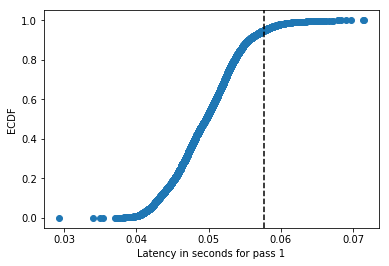

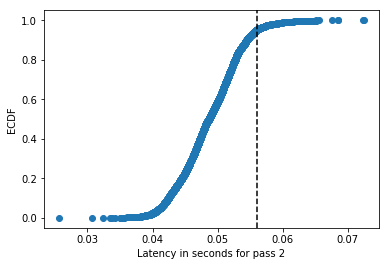

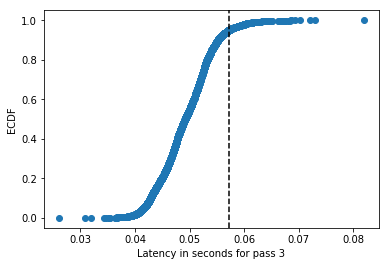

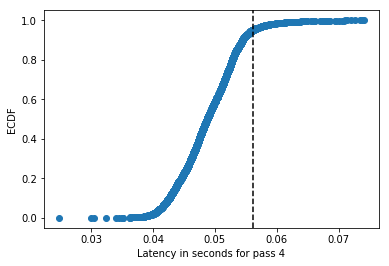

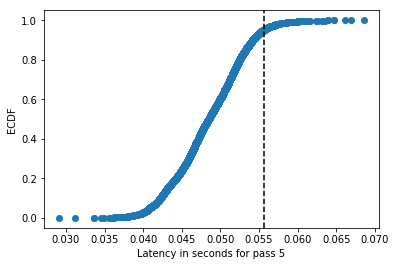

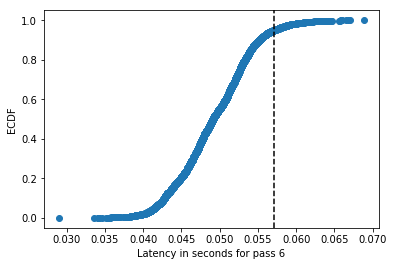

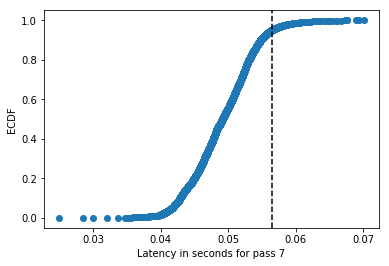

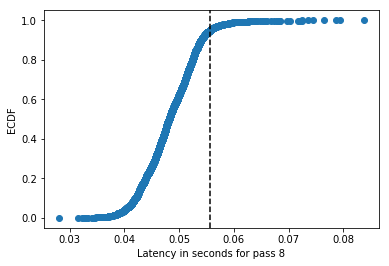

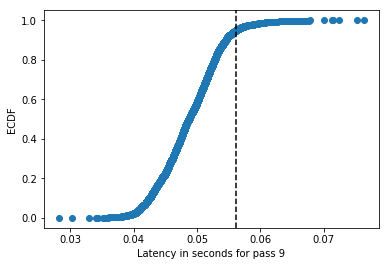

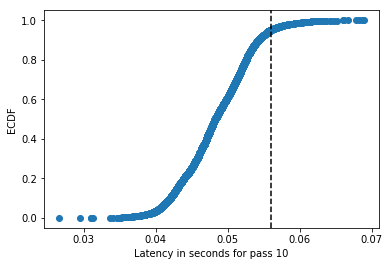

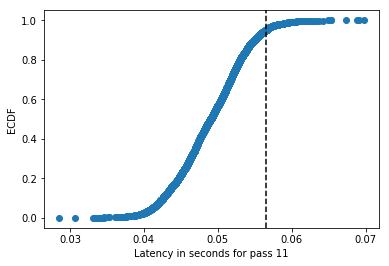

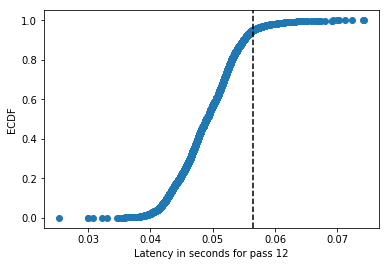

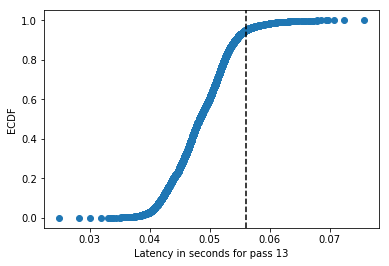

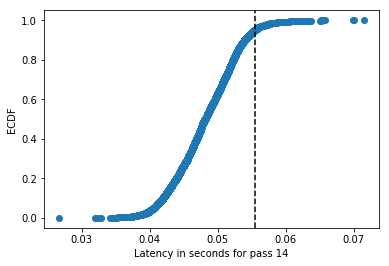

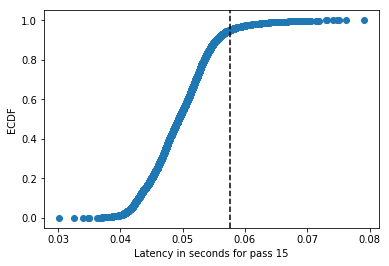

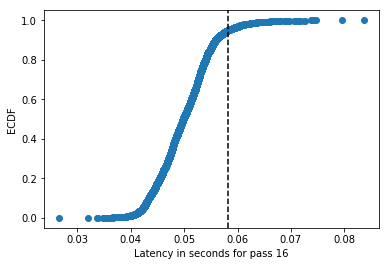

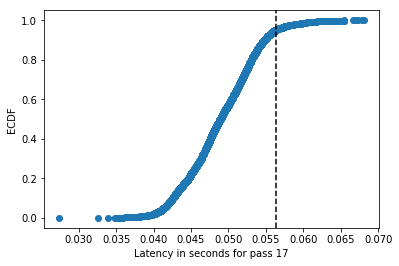

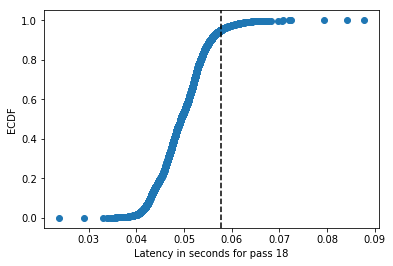

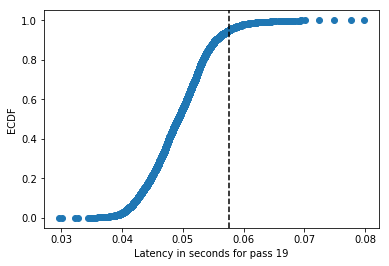

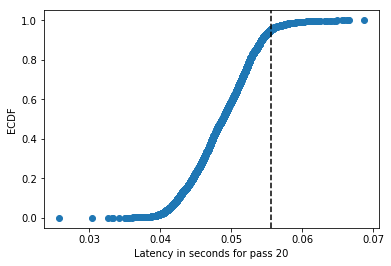

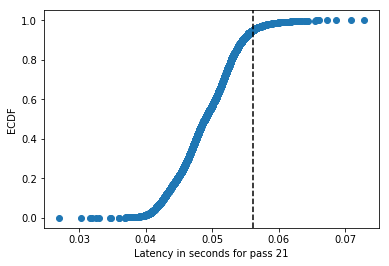

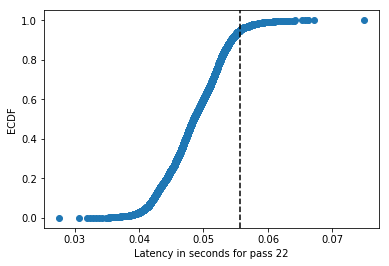

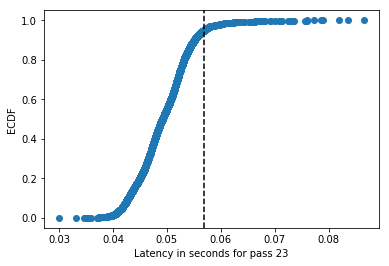

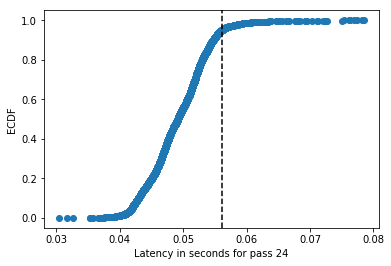

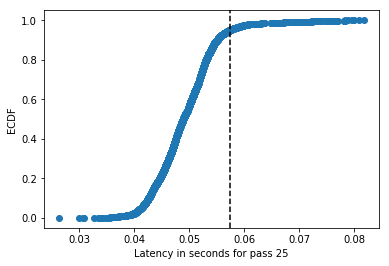

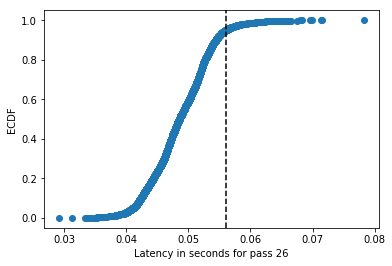

In [3]:
for index, row in df.iterrows():
    plt.figure()
    ecdf(x=list(row), x_label='Latency in seconds for pass ' + str(index + 1), percentile=0.95)